# Sentiment Analysis using *TextBlob*

TextBlob is a Python library that provides natural language processing capabilities, including sentiment analysis. 

TextBlob's sentiment analysis capabilities rely on a machine learning algorithm that assigns a polarity score to a given piece of text, which represents the degree of positivity or negativity of the sentiment. 

TextBlob's sentiment analysis also provides a subjectivity score, which represents the degree to which the text is subjective or opinionated. 

TextBlob's sentiment analysis is based on a pre-trained model that can be easily used out-of-the-box, and it also allows for customization by training a model on a specific dataset. 

TextBlob's sentiment analysis is useful in a variety of applications, such as social media monitoring, customer feedback analysis, and market research.

In [14]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to C:\Users\Yamini
[nltk_data]     Manral\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
text = pd.read_csv('cleaned.csv')

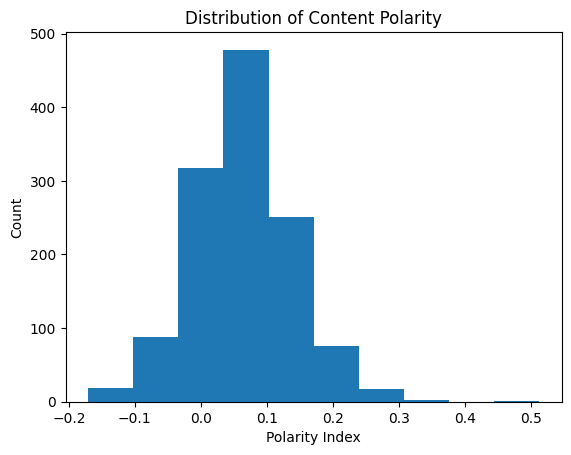

In [15]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
text['content_polarity']=text['Content'].apply(lambda x : polarity(x))
# Histogram of content polarity
text['content_polarity'].hist(bins=10, grid=False)
plt.title('Distribution of Content Polarity')
plt.xlabel('Polarity Index')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

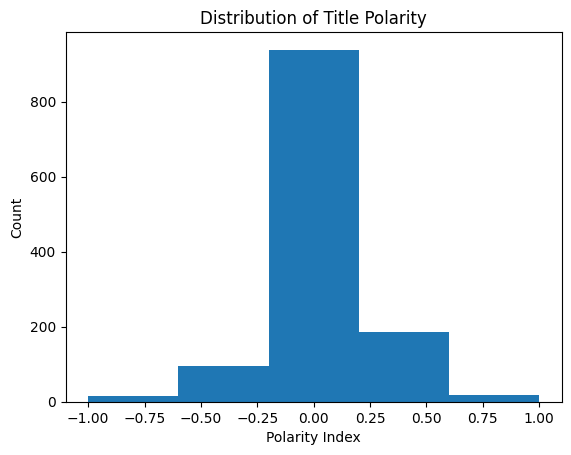

In [16]:
text['title_polarity'] = text['Title'].apply(lambda x : polarity(x))
text['title_polarity'].hist(bins = 5, grid = False)

plt.title('Distribution of Title Polarity')
plt.xlabel('Polarity Index')
plt.ylabel('Count')

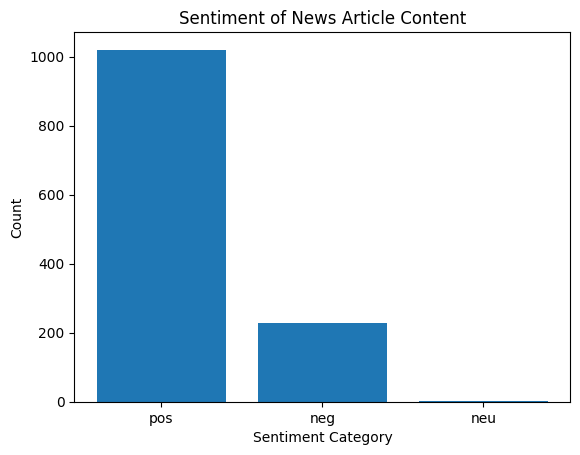

<BarContainer object of 3 artists>

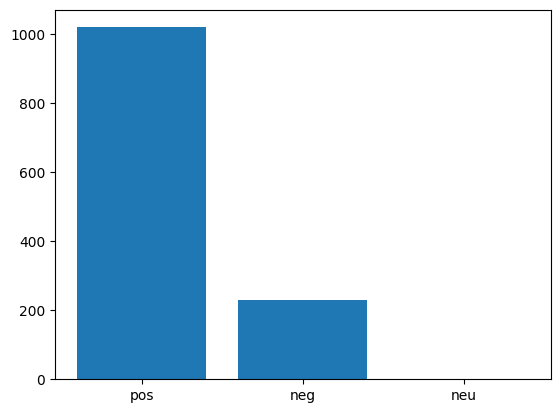

In [19]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

text['c_polarity']=text['content_polarity'].map(lambda x: sentiment(x))
# Bar chart of content polarity sentiment categories
plt.bar(text.c_polarity.value_counts().index, text.c_polarity.value_counts())
plt.title('Sentiment of News Article Content')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

plt.bar(text.c_polarity.value_counts().index,
       text.c_polarity.value_counts())

Text(0, 0.5, 'Count')

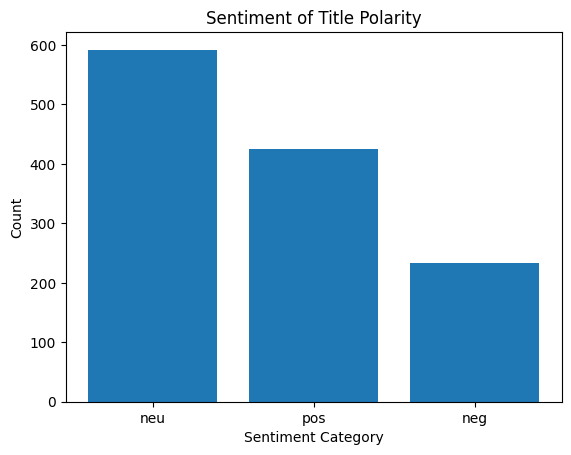

In [20]:
text['t_polarity']=text['title_polarity'].map(lambda x: sentiment(x))

plt.bar(text.t_polarity.value_counts().index,
        text.t_polarity.value_counts())
plt.title('Sentiment of Title Polarity')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

In [21]:
text

,Unnamed: 0,Title,Content,Number of Words,Category,SubCategory,Word Count(new),Content_list,content_polarity,title_polarity,c_polarity,t_polarity
0,0,coupons backfired bed bath beyond,decades blue white paper coupons defined bed b...,638,/business/bed-bath-beyond-coupons-strategy-his...,NaN,375,"['decades', 'blue', 'white', 'paper', 'coupons...",0.126459,0.000000,pos,neu
1,1,appeals court largely sides apple fortnite ant...,federal appeals court largely sided apple mond...,622,/tech/apple-epic-appeals-court,NaN,377,"['federal', 'appeals', 'court', 'largely', 'si...",0.047908,0.214286,pos,pos
2,2,wall street journal bud light owner places two...,anheuser-busch placed two executives managed b...,542,/business/anheuser-execs-on-leave,NaN,319,"['anheuser-busch', 'placed', 'two', 'executive...",0.140278,0.400000,pos,pos
3,3,layoffs loom us manufacturing sector backlogs ...,us manufacturers mostly worked way backlogged ...,654,/economy/manufacturing-layoffs-backlogs,NaN,355,"['us', 'manufacturers', 'mostly', 'worked', 'w...",-0.000180,0.000000,neg,neu
4,4,jury selected ed sheeran music copyright case,copyright infringement case british pop artist...,551,/media/ed-sheeran-copyright-trial,NaN,314,"['copyright', 'infringement', 'case', 'british...",0.076504,0.000000,pos,neu
...,...,...,...,...,...,...,...,...,...,...,...,...
1245,1245,chatgpt health care providers ai chatbot make ...,openai ceo sam altman little bit scared chatgp...,1554,HEALTHY LIVING,NaN,886,"['openai', 'ceo', 'sam', 'altman', 'little', '...",0.031213,0.000000,pos,neu
1246,1246,better sleep exercise long,rest simple tweaks tech trouble sleeping 30 mi...,553,HEALTHY LIVING,NaN,312,"['rest', 'simple', 'tweaks', 'tech', 'trouble'...",0.016181,0.225000,pos,pos
1247,1247,massachusetts town avian flu detected among 24...,fox news flash top headlines check whats click...,324,HEALTHY LIVING,NaN,193,"['fox', 'news', 'flash', 'top', 'headlines', '...",-0.043933,-0.200000,neg,neg
1248,1248,world lost faith childhood vaccines covid unic...,fox news flash top headlines check whats click...,399,HEALTHY LIVING,NaN,238,"['fox', 'news', 'flash', 'top', 'headlines', '...",0.084503,0.000000,pos,neu


# Sentiment analysis using VADER (Valence Aware Dictionary for Sentiment Reasoning)

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a Python library that is used for sentiment analysis. 

Sentiment analysis involves determining the emotional tone of a piece of text, and VADER uses a combination of rule-based heuristics and machine learning techniques to analyze the sentiment of a given text. 

VADER is particularly well-suited for analyzing social media data and other short, informal texts, and it is capable of detecting the sentiment of individual words and phrases, as well as the overall sentiment of a piece of text. 

VADER returns a sentiment score for each piece of text, which represents the level of positivity, negativity, or neutrality of the sentiment. 

The sentiment score can be used to classify a piece of text as positive, negative, or neutral, and it can be used in a variety of applications, such as brand monitoring, customer feedback analysis, and market research.

In [22]:
import numpy as np
import pandas as pd
import nltk
#download vader from nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to C:\Users\Yamini
[nltk_data]     Manral\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
#creating an object of sentiment intensity analyzer
sia= SentimentIntensityAnalyzer()

text_vader = text[['Title', 'Content']]
text_vader

,Title,Content
0,coupons backfired bed bath beyond,decades blue white paper coupons defined bed b...
1,appeals court largely sides apple fortnite ant...,federal appeals court largely sided apple mond...
2,wall street journal bud light owner places two...,anheuser-busch placed two executives managed b...
3,layoffs loom us manufacturing sector backlogs ...,us manufacturers mostly worked way backlogged ...
4,jury selected ed sheeran music copyright case,copyright infringement case british pop artist...
...,...,...
1245,chatgpt health care providers ai chatbot make ...,openai ceo sam altman little bit scared chatgp...
1246,better sleep exercise long,rest simple tweaks tech trouble sleeping 30 mi...
1247,massachusetts town avian flu detected among 24...,fox news flash top headlines check whats click...
1248,world lost faith childhood vaccines covid unic...,fox news flash top headlines check whats click...


In [25]:
#creating new column scores using polarity scores function
text_vader['scores']=text_vader['Title'].apply(lambda body: sia.polarity_scores(str(body)))
text_vader 

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_21640\1908965534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_vader['scores']=text_vader['Title'].apply(lambda body: sia.polarity_scores(str(body)))


,Title,Content,scores
0,coupons backfired bed bath beyond,decades blue white paper coupons defined bed b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,appeals court largely sides apple fortnite ant...,federal appeals court largely sided apple mond...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,wall street journal bud light owner places two...,anheuser-busch placed two executives managed b...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp..."
3,layoffs loom us manufacturing sector backlogs ...,us manufacturers mostly worked way backlogged ...,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp..."
4,jury selected ed sheeran music copyright case,copyright infringement case british pop artist...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...
1245,chatgpt health care providers ai chatbot make ...,openai ceo sam altman little bit scared chatgp...,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp..."
1246,better sleep exercise long,rest simple tweaks tech trouble sleeping 30 mi...,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp..."
1247,massachusetts town avian flu detected among 24...,fox news flash top headlines check whats click...,"{'neg': 0.496, 'neu': 0.504, 'pos': 0.0, 'comp..."
1248,world lost faith childhood vaccines covid unic...,fox news flash top headlines check whats click...,"{'neg': 0.207, 'neu': 0.541, 'pos': 0.252, 'co..."


In [26]:
text_vader['compound']=text_vader['scores'].apply(lambda score_dict:score_dict['compound'])
text_vader['positive']=text_vader['scores'].apply(lambda pos_dict:pos_dict['pos'])
text_vader['negative']=text_vader['scores'].apply(lambda neg_dict:neg_dict['neg'])

# We then create a new column named type, which indicates whether the review is pos, neg, or neutral.

text_vader['type']=''
text_vader.loc[text_vader.compound>0,'type']='POS'
text_vader.loc[text_vader.compound==0,'type']='NEUTRAL'
text_vader.loc[text_vader.compound<0,'type']='NEG'
text_vader.head()

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_21640\475677200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_vader['compound']=text_vader['scores'].apply(lambda score_dict:score_dict['compound'])
C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_21640\475677200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_vader['positive']=text_vader['scores'].apply(lambda pos_dict:pos_dict['pos'])
C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_21640\475677200.py:3: SettingWithCopyWarning:

,Title,Content,scores,compound,positive,negative,type
0,coupons backfired bed bath beyond,decades blue white paper coupons defined bed b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,NEUTRAL
1,appeals court largely sides apple fortnite ant...,federal appeals court largely sided apple mond...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,NEUTRAL
2,wall street journal bud light owner places two...,anheuser-busch placed two executives managed b...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",-0.0516,0.0,0.091,NEG
3,layoffs loom us manufacturing sector backlogs ...,us manufacturers mostly worked way backlogged ...,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...",-0.2263,0.0,0.241,NEG
4,jury selected ed sheeran music copyright case,copyright infringement case british pop artist...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,NEUTRAL


In [27]:
len=text_vader.shape
print(len)
(rows,cols)=len
pos=0
neg=0
neutral=0
for i in range(0,rows):
    if text_vader.loc[i][6]=="POS":
        pos=pos+1
    if text_vader.loc[i][6]=="NEG":
        neg=neg+1
    if text_vader.loc[i][6]=="NEUTRAL":
        neutral=neutral+1
print("Positive :"+str(pos) + "  Negative :" + str(neg) + "   Neutral :"+ str(neutral))

(1250, 7)
Positive :338  Negative :481   Neutral :431


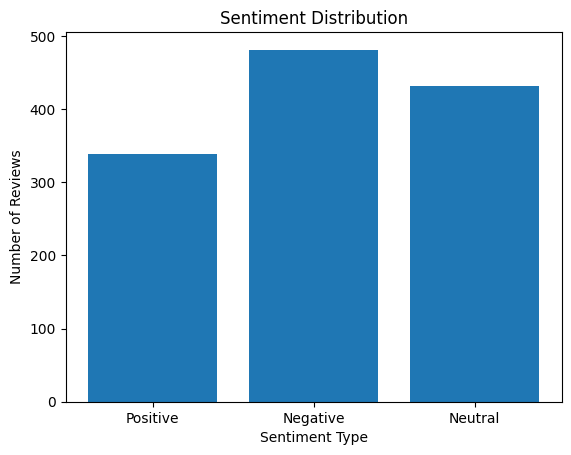

In [28]:
# Creating a bar chart of the sentiment distribution:

# set up the data for plotting
labels = ['Positive', 'Negative', 'Neutral']
values = [pos, neg, neutral]

# create the bar chart
plt.bar(labels, values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Reviews')
plt.show()

In [29]:
def preprocess_text(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # convert to lowercase
    text = text.lower()
    # remove stopwords
    stopwords_list = stopwords.words('english')
    text_tokens = text.split()
    filtered_text = [word for word in text_tokens if word not in stopwords_list]
    return ' '.join(filtered_text)

In [30]:
text_vader['Content'] = text_vader['Content'].apply(preprocess_text)
text_vader

C:\Users\Yamini Manral\AppData\Local\Temp\ipykernel_21640\2136865112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_vader['Content'] = text_vader['Content'].apply(preprocess_text)


,Title,Content,scores,compound,positive,negative,type
0,coupons backfired bed bath beyond,decades blue white paper coupons defined bed b...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,NEUTRAL
1,appeals court largely sides apple fortnite ant...,federal appeals court largely sided apple mond...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,NEUTRAL
2,wall street journal bud light owner places two...,anheuserbusch placed two executives managed bu...,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",-0.0516,0.000,0.091,NEG
3,layoffs loom us manufacturing sector backlogs ...,us manufacturers mostly worked way backlogged ...,"{'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...",-0.2263,0.000,0.241,NEG
4,jury selected ed sheeran music copyright case,copyright infringement case british pop artist...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,NEUTRAL
...,...,...,...,...,...,...,...
1245,chatgpt health care providers ai chatbot make ...,openai ceo sam altman little bit scared chatgp...,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",0.7184,0.429,0.000,POS
1246,better sleep exercise long,rest simple tweaks tech trouble sleeping 30 mi...,"{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'comp...",0.4404,0.492,0.000,POS
1247,massachusetts town avian flu detected among 24...,fox news flash top headlines check whats click...,"{'neg': 0.496, 'neu': 0.504, 'pos': 0.0, 'comp...",-0.7845,0.000,0.496,NEG
1248,world lost faith childhood vaccines covid unic...,fox news flash top headlines check whats click...,"{'neg': 0.207, 'neu': 0.541, 'pos': 0.252, 'co...",0.1280,0.252,0.207,POS
